In [6]:
import csv
import networkx as nx
import matplotlib.pyplot as plt

In [7]:
def csvToList(f):
    """
    Converts CSV file into 2D list format.
    :param f (str): The CSV to be converted.
    :return: 2D list
    """
    with open(f, 'r') as file:
        csvData = list(csv.reader(file))
        rowNum = len(csvData)
        colNum = len(csvData[0])
        mazeList = [[0 for i in range(colNum)] for j in range(rowNum)]
        for i in range(rowNum):
            colNum = len(csvData[i])
            for j in range(colNum):
                mazeList[i][j] = csvData[i][j]
    return mazeList

def validateMaze(mazeList):
    """
    Validates if a 2D list is a maze by checking if the following rules are passed:
    - There must be a start and end point.
    - There can be no more than one start point.
    - There can be no more than one end point.
    :param mazeList: The 2D list to be validated.
    :return: validation (bool), errors (str)
    """
    validation = True
    errors = ""
    startCount = 0
    endCount = 0
    for i in range(len(mazeList)):
        for j in range(len(mazeList[0])):
            if mazeList[i][j] == "S":
                startCount += 1
            elif mazeList[i][j] == "E":
                endCount += 1
    if startCount == 0 or endCount == 0:
        validation = False
        errors += "There must be a start and end point.\n"
    if startCount > 1:
        validation = False
        errors += "There can be no more than one start point.\n"
    if endCount > 1:
        validation = False
        errors += "There can be no more than one end point.\n"
    return validation, errors

def displayMaze(mazeList):
    """
    Print out a 2D list in the format of a Maze.
    :param mazeList (list): The 2D list to be printed.
    """
    row = ""
    for i in range(len(mazeList)):
        for j in range(len(mazeList[0])):
            if row != "": # add a space between each entry unless it is the first.
                row += " "
            if mazeList[i][j] == "": # if the entry is blank, put a space in its place.
                row += " "
            else:
                row += str(mazeList[i][j]) # otherwise, concat the character to the entire string.
        print(row)
        row = "" # reset the string to print the next line.

def listToNetworkXGraph(mazeList, display=False):
    """
    Converts a list to a weighted NetworkX graph.
    :param mazeList (list): The 2D list to be referenced
    :param display (bool): Whether to display the graph. Default is False.
    :return: graph
    """
    G = nx.grid_2d_graph(len(mazeList),len(mazeList[0])) # Create a row X col NetworkX grid.
    for u,v,d in G.edges(data=True):
        if mazeList[v[0]][v[1]] == "W":
            d["weight"] = 999999
        elif isinstance(mazeList[v[0]][v[1]], int):
            d["weight"] = mazeList[v[0]][v[1]]
        else:
            d["weight"] = 1
    nx.write_weighted_edgelist(G, "weighted.edgelist")
    if display==True:
        colorMap = []
        labels = dict()
        pos = dict()
        count = 0
        for i in range(len(mazeList)):
            for j in range(len(mazeList[0])):
                pos[i,j] = j,len(mazeList)-i
                labels[i,j] = i,j
                if mazeList[i][j] == "W":
                    colorMap.append("black")
                elif mazeList[i][j] == "S":
                    colorMap.append("green")
                elif mazeList[i][j] == "E":
                    colorMap.append("red")
                else:
                    colorMap.append("white")
        print(len(colorMap))
        # for n in G:
            # if n == (1,0):
            #     colorMap.append('red')
            # else:
            #     colorMap.append('green')
        nx.draw_networkx(G,pos, node_color=colorMap, labels=labels, font_size=6)
        # nx.draw_networkx(G,pos, node_color=colorMap, with_labels=False, font_size=6)
        plt.axis("off")
        plt.show()
    return G

176


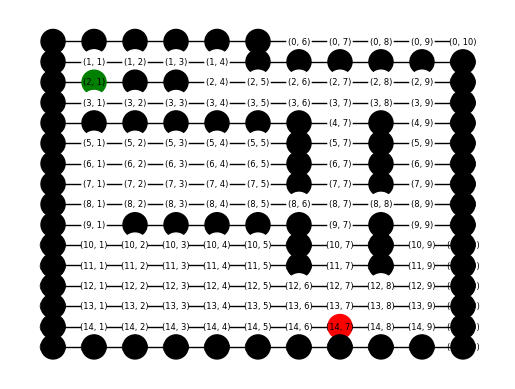

In [9]:
with open('NavMazeExample.csv', 'r') as file:
    mazeList = csvToList("NavMazeExample.csv")
    validation = validateMaze(mazeList)
    if validation[0]:
        # displayMaze(mazeList)
        G = listToNetworkXGraph(mazeList, display=True)
    else:
        print(validation[1])
        exit()
